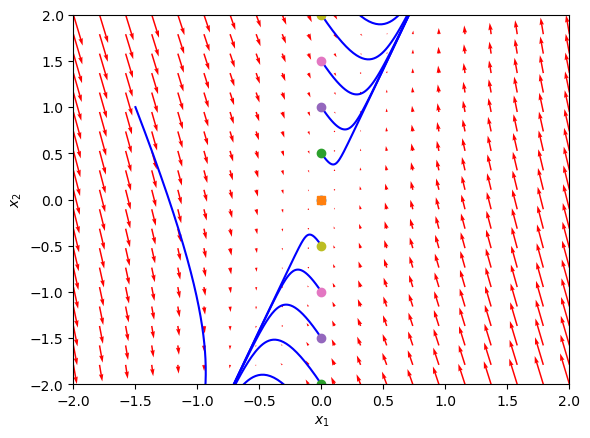

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

from scipy.integrate import odeint

# Definiciones de las funciones que caracterizan el sistema de EDOS (Elegir una definicion)
###########################################################################################



#NODO ESTABLE
# def f(X, t):
#     x1, x2 = X
#     return [(-1/2)*x1-(3/4)*x2, x1-(5/2)*x2]


#NODO INESTABLE
#def f(X, t):
#    x1, x2 = X
#    return [(1/2)*X1+(3/4)*X2, -x1+(5/2)*x2]


#PUNTO ESTRELLA
#def f(X, t):
#    x1, x2 = X
#    return [3*x1, 3*x2]    

#NODO IMPROPIO
# def f(X, t):
#    x1, x2 = X
#    return [(1)*x1+(2)*x2,(-2)*x1+(-3)*x2]  


#FOCO/PUNTO ESPIRAL ESTABLE
#def f(X, t):
#    x1, x2 = X
#    return [x1-5*x2, 4*x1-3*x2]


#FOCO/PUNTO ESPIRAL INESTABLE
#def f(X, t):
#    x1, x2 = X
#    return [2*x1-1*x2, 3*x1+2*x2]


#CENTRO
#def f(X, t):
#    x1, x2 = X
#    return [x1+2*x2, (-5)*x1-x2]

#PUNTO SILLA
#def f(X, t):
#    x1, x2 = X
#    return [1.5*x1-1*x2, 1.5*x1-2*x2]
 

#ECUACIÓN ESCALAR (Diagrama de fases plano) x'=2x (Solución: x(t)=e^(2t)+C). Trayectorias inestables.
#def f(X, t):
#    x1, x2 = X
#    return [2*x1, 0]


#ECUACIÓN ESCALAR (Diagrama de fases plano) x'=-2x (Solución: x(t)=e^(-2t)+C). Trayectorias estables.
#def f(X, t):
#    x1, x2 = X
#    return [-2*x1, 0]

#ECUACIÓN ESCALAR (Diagrama de fases plano) x'=x^2 
#def f(X, t):
#    x1, x2 = X
#    return [x1*x1, 0]


# Valores de las variables (coordenadas en el plano de fases) donde evaluaremos el vector de campo
x1 = np.linspace(-2.0, 2.0, 20)
x2 = np.linspace(-2.0, 2.0, 20)

# Creación de una malla a partir de los valores indicados
X1, X2 = np.meshgrid(x1, x2)

t = 0

u, v = np.zeros(X1.shape), np.zeros(X2.shape)

# Número de valores en cada eje
NI, NJ = X1.shape

def f(X, t):
    x1, x2 = X
    return [(-2)*x1+x2, (2*(4))*x1+(-2)*x2]

# Cómputo del vector de campo en las coordenadas elegidas
for i in range(NI):
    for j in range(NJ):
        x1_aux = X1[i, j]
        x2_aux = X2[i, j]
        xprime = f([x1_aux, x2_aux], t)
        u[i,j] = xprime[0]
        v[i,j] = xprime[1]
# Pintamos los vectores de campo eligiendo como origen los puntos donde se han evaluado  
Q = plt.quiver(X1, X2, u, v, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
#plt.show()
# Integración de trayectorias a partir de una lista de condiciones iniciales
# Asignamos x10=0 y variamos solamente x20 (se puede modificar)
for x20 in [-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 2000) #Genera un array de extremos 0 y 50, con los elementos que queramos
    x0 = [0.0, x20]
    xs = odeint(f, x0, tspan)
    plt.plot(xs[:,0], xs[:,1], 'b-') # (pintamos de azul los puntos de las trayectorias)
    plt.plot([xs[0,0]], [xs[0,1]], 'o') # (círculo para comienzo de trayectoria)
    plt.plot([xs[-1,0]], [xs[-1,1]], 's') # (cuadrado para final de trayectoria)
#Trayectoria que nace de un punto concreto:
xini=[-1.5,1]
tspan = np.linspace(0, 5, 2000)
xs=odeint(f,xini,tspan)
plt.plot(xs[:,0], xs[:,1], 'b-')
plt.xlim([-2, 2])
#plt.savefig('images/phase-portrait-2.png')
plt.show()

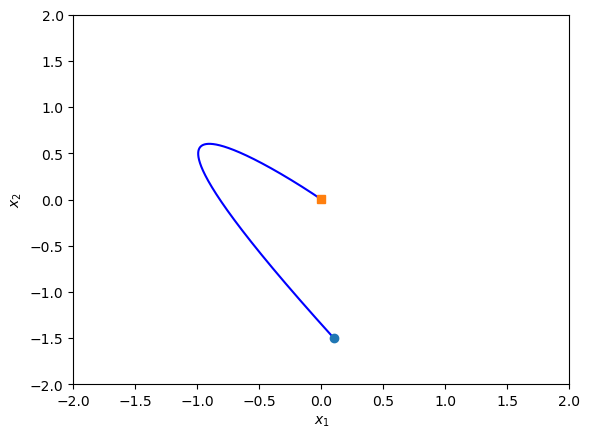

In [2]:
# Para pintar solamente trayectorias que nacen de otros puntos
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

# Elegimo condición inicial
xini=[0.1,-1.5]
tspan = np.linspace(0, 8, 2000)
xs=odeint(f,xini,tspan)
plt.plot(xs[:,0], xs[:,1], 'b-')
plt.plot([xs[0,0]], [xs[0,1]], 'o') # (círculo para comienzo de trayectoria)
plt.plot([xs[-1,0]], [xs[-1,1]], 's') # (cuadrado para final de trayectoria)

plt.show()